### Dataset Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The goal of this project is to build a logistic regression model to predict weather each individual in the dataset has diabetes or not. 

Data downloaded from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

### Loading and Exploring the Data

In [1]:
import pandas as pd

#Simplify column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

#Load dataset
pima = pd.read_csv('diabetes.csv', header = None, names = col_names)

In [2]:
#Explore dataset
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
#Drop the 0th row of labels
pima = pima.drop(0, axis = 0)
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Convert data from strings to numeric datatypes
pima['pregnant'] = pd.to_numeric(pima['pregnant'])
pima['glucose'] = pd.to_numeric(pima['glucose'])
pima['bp'] = pd.to_numeric(pima['bp'])
pima['skin'] = pd.to_numeric(pima['skin'])
pima['insulin'] = pd.to_numeric(pima['insulin'])
pima['bmi'] = pd.to_numeric(pima['bmi'])
pima['pedigree'] = pd.to_numeric(pima['pedigree'])
pima['age'] = pd.to_numeric(pima['age'])
pima['label'] = pd.to_numeric(pima['label'])
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Print number of missing values in pima dataframe
pima.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

### Selecting Features

The columns will be divided into depending/target variables and independent/feature variables.

In [7]:
#Split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols] #Feature variables
y = pima['label'] #Target Variable

### Splitting the Data into Training Set and Test Set

In [8]:
#Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

#75% of the data will be used for training and 25% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

### Model Development and Prediction

In [9]:
#Import the class
from sklearn.linear_model import LogisticRegression

#Instantiate the model
logreg = LogisticRegression(random_state = 16) #random state set for reproducibility

#Fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\Andy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Evaluation and Confusion Matrix

In [10]:
#Import the metric class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 24,  43]], dtype=int64)

### Visualize Confusion Matrix with Heatmap

Text(0.5, 257.44, 'Predicted Label')

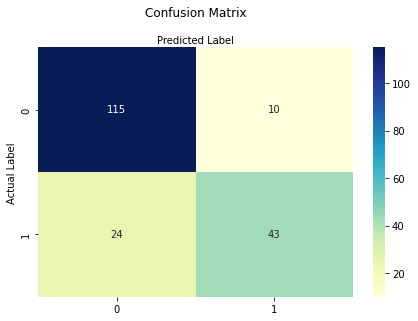

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



### Confusion Matrix Evaluation Metrics

In [15]:
from sklearn.metrics import classification_report 

target_names = ['Without Diabetes', 'With Diabetes']
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

Without Diabetes       0.83      0.92      0.87       125
   With Diabetes       0.81      0.64      0.72        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



### ROC Curve

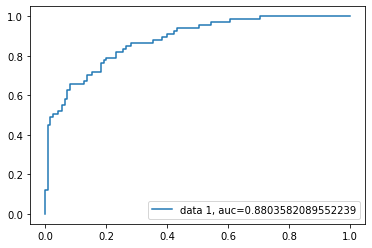

In [16]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = 'data 1, auc='+str(auc))
plt.legend(loc = 4)
plt.show()

AUC score of 0.88. The closer to 1 the AUC value is the better; 1 being a perfect score. 